#                                Predicting House Prices with Linear Regression



![](house.jpg)

### Predicting House Prices/Data Preprocessing Part:

In [12]:
#Importing libraries and reading dataset

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 
df=pd.read_csv("kc_house_data.csv")
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

So in this dataset we are able to see that all columns except the date are numbers

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df.shape

(21613, 21)

In [35]:
#Finding missing values:

df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [36]:
#The total number of missing values
df.isnull().sum().sum()
#The dataset doesn’t contain any nulls

0

So in this dataset we are able to see that all columns except the date are numbers

### Predicting House Prices/Data Visualization Part:

<AxesSubplot:title={'center':'Histogram of different prices'}, xlabel='price', ylabel='Frequency'>

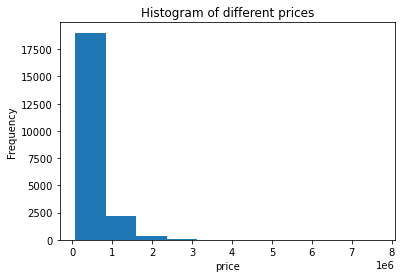

In [5]:
#Histogram of different prices
plt.title("Histogram of different prices")
plt.xlabel("price")
df["price"].plot.hist()


<AxesSubplot:xlabel='price', ylabel='Density'>

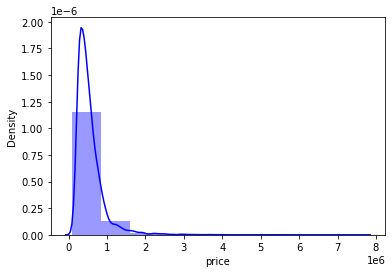

In [26]:
sns.distplot(df["price"], bins=10, hist=True, kde=True, color="blue")


Most of the density lies between 100k and 250k, but there appears to be a lot of outliers on the pricier side.

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

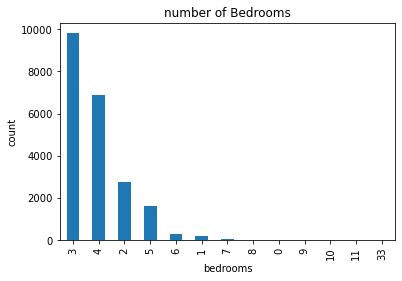

In [9]:
#Number of bedrooms
df['bedrooms'].value_counts().plot(kind= 'bar')
plt.title('number of Bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('count')
sns.despine



3 bedroom houses are most commonly sold followed by 4 bedroom. 

<Figure size 360x360 with 0 Axes>

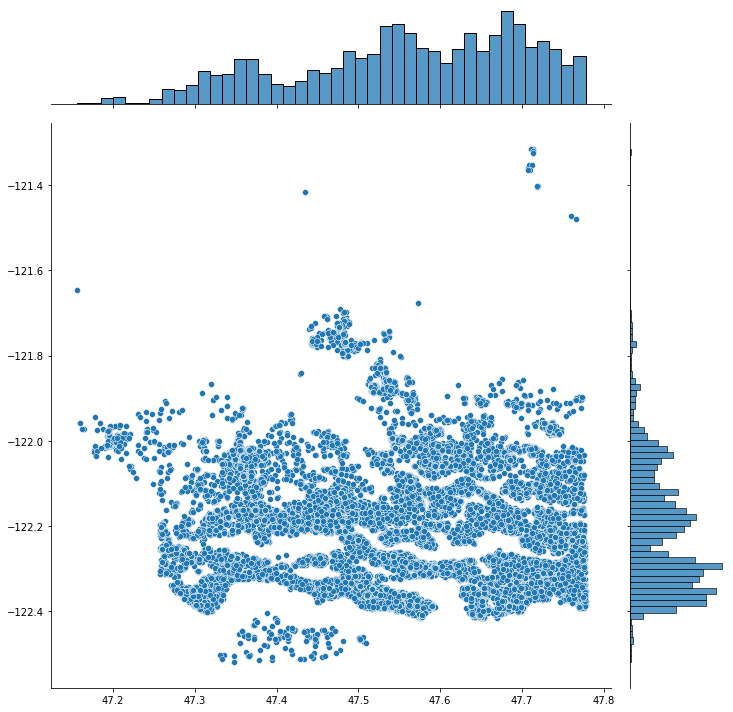

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [17]:
#Visualizing the location of the houses based on latitude and longitude.

plt.figure(figsize=(5,5))
sns.jointplot(x=df.lat.values, y=df.long.values, size=10)
plt.ylabel('long')
plt.xlabel('lat')
plt.show()
sns.despine



For latitude between 47.7 and 48.8 there are many houses , which would mean that maybe it’s an ideal location 
For longitude we can see that concentration is high between -122.2 to -122.4. Which would mean that most of the buy’s has been for this particular location.

<AxesSubplot:xlabel='long', ylabel='Density'>

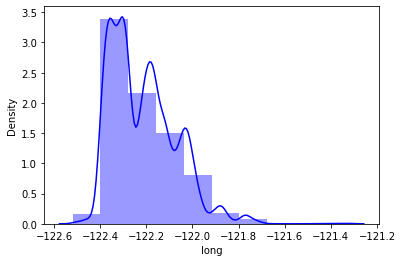

In [18]:
sns.distplot(df["long"], bins=10, hist=True, kde=True, color="blue")

<AxesSubplot:xlabel='lat', ylabel='Density'>

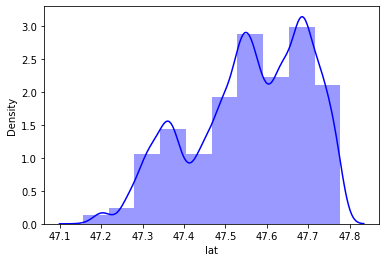

In [19]:
sns.distplot(df["lat"], bins=10, hist=True, kde=True, color="blue")

<AxesSubplot:xlabel='sqft_above', ylabel='Density'>

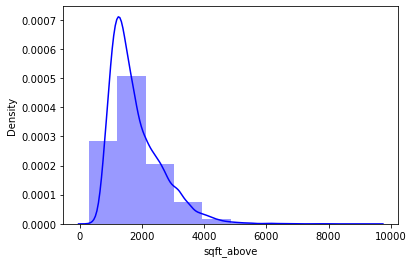

In [28]:
sns.distplot(df["sqft_above"], bins=10, hist=True, kde=True, color="blue")



<AxesSubplot:xlabel='sqft_basement', ylabel='Density'>

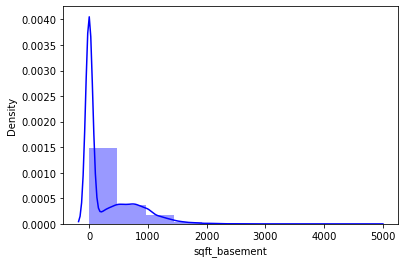

In [29]:
sns.distplot(df["sqft_basement"], bins=10, hist=True, kde=True, color="blue")

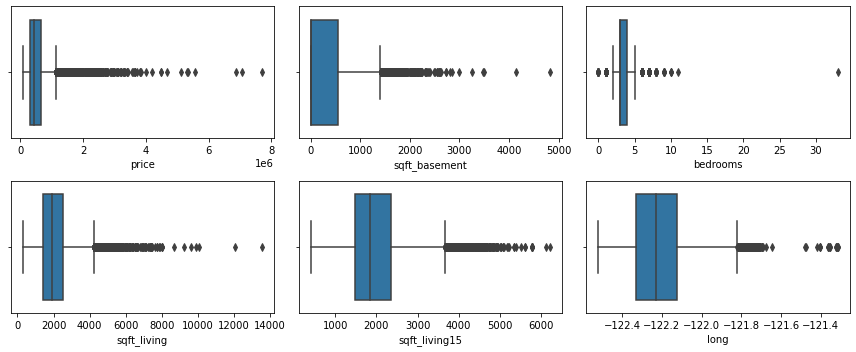

In [67]:
#Outlier Analysis

fig, axs = plt.subplots(2,3, figsize = ((12,5)))
plt1 = sns.boxplot(df['price'],ax = axs[0,0])
plt2 = sns.boxplot(df['sqft_basement'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['sqft_living'], ax = axs[1,0])
plt2 = sns.boxplot(df['sqft_living15'], ax = axs[1,1])
plt3 = sns.boxplot(df['long'], ax = axs[1,2])
plt.tight_layout()

<AxesSubplot:>

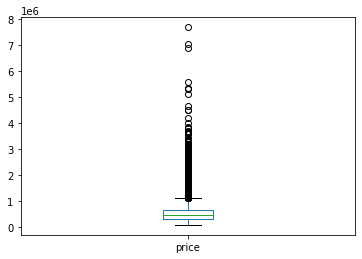

In [68]:
df["price"].plot.box()

Price has considerable outliers

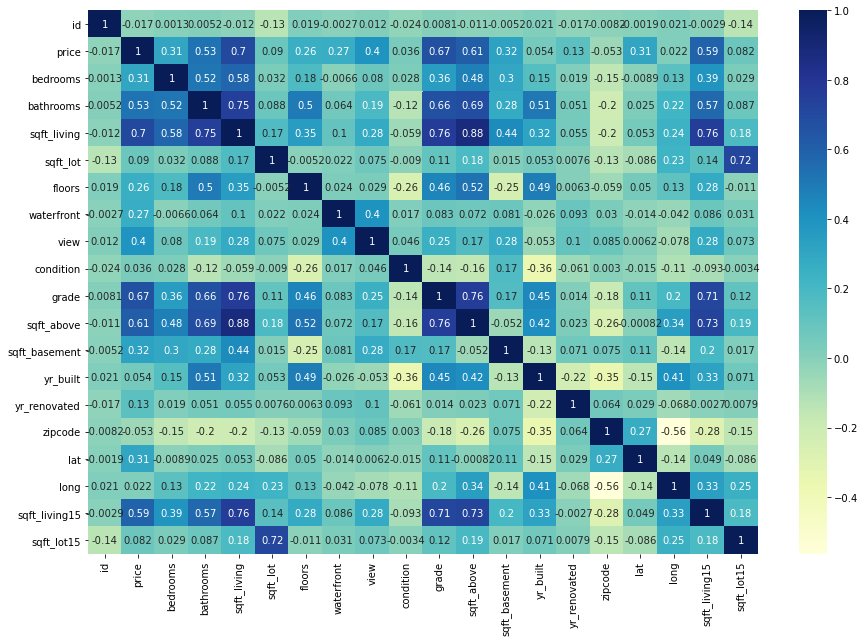

In [80]:
#Let's check the correlations between variables to see wich variables are highly correlated
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()




sqft_living, grade, sqft_above and sqft_living15 seem to have a high influence in price

### How common factors are affecting the price of the houses ?

Text(0.5, 1.0, 'Price VS Longitude')

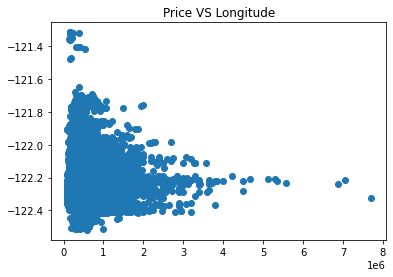

In [22]:
## Price VS Longitude
plt.scatter(df.price,df.long)
plt.title('Price VS Longitude')



The scatter plot tells us about the longitude and it gives us observation that -122.2 to -122.4 sells houses at much higher amount.

Text(0.5, 1.0, 'Price VS Square Feet')

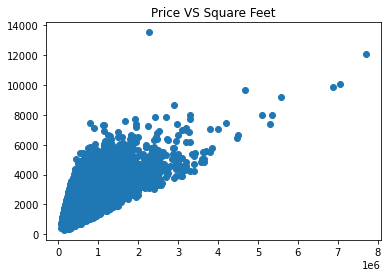

In [20]:
## Price VS Square feet
plt.scatter(df.price,df.sqft_living)
plt.title('Price VS Square Feet')



larger living area  mean a higher price.
Many factors are affecting the prices of the house , like square feet which increases the price of the house

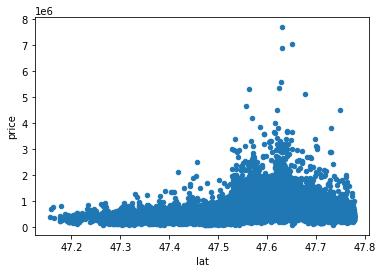

In [82]:
#Price VS Latitude

df.plot(kind='scatter', x="lat", y="price")
plt.show()



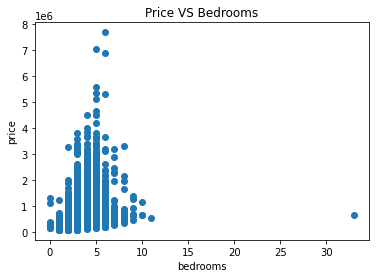

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [23]:
## Price VS Bedrooms
plt.scatter(df.bedrooms,df.price)
plt.title('Price VS Bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show()
sns.despine

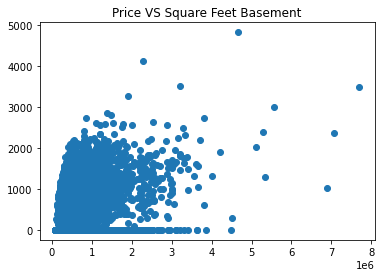

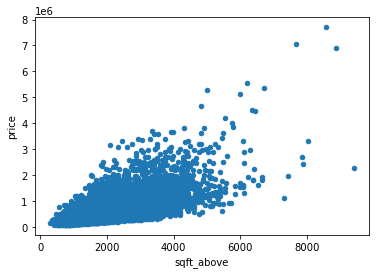

In [83]:
##Price VS Square Feet Basement
plt.scatter(df.price,df.sqft_basement)
plt.title('Price VS Square Feet Basement')

##Price VS Square Feet Above
df.plot(kind='scatter', x="sqft_above", y="price")
plt.show()


The basement area seems like it has a predictive power for our model.

Text(0.5, 1.0, 'Floors VS Price')

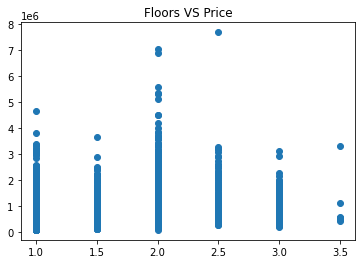

In [85]:
##  Floors VS price

plt.scatter(df.floors,df.price)
plt.title('Floors VS Price')



Text(0.5, 1.0, 'WaterFront VS Price')

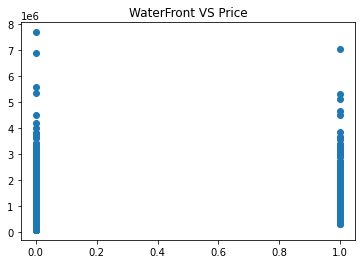

In [28]:
## WaterFront VS Price
plt.scatter(df.waterfront,df.price)
plt.title('WaterFront VS Price')

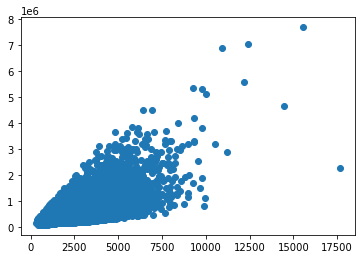

In [30]:
#Total square feet inclding basement

plt.scatter((df['sqft_living']+df['sqft_basement']), df['price'])


Text(0.5, 1.0, 'Price VS Square Feet15')

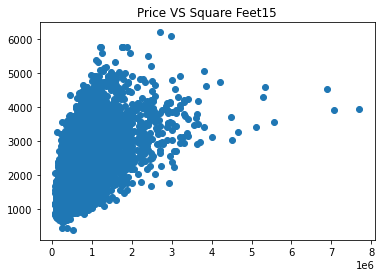

In [87]:
## Price VS Square feet15
plt.scatter(df.price,df.sqft_living15)
plt.title('Price VS Square Feet15')




Text(0.5, 1.0, 'Grade VS Price')

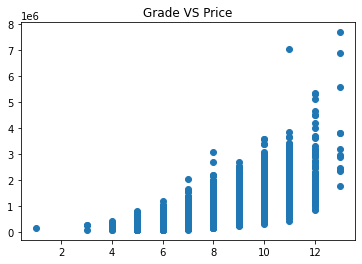

In [37]:
## Grade VS Price
plt.scatter(df.grade,df.price)
plt.title('Grade VS Price')

### Predicting House Prices/Linear Regression Part:

In [49]:
# Prepare the data: define predictor and response variables

x=df["sqft_living"].values[:,np.newaxis]
y=df["price"].values

#split the data into 65% training and 35% testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) 

#Inisialize the linear regression model
model=LinearRegression()  

#Fit the model on the training set
model.fit(x_train,y_train)

#check the score of our data
print(model.score(x_test,y_test))


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

# Print the coefficients
print (model.intercept_)
print (model.coef_)


0.4996528488387417
MSE 62902408306.86502
R squared 0.4996528488387417
-50697.94107634993
[284.00261205]


After fitting our data to the model we can check the score of our data ie , prediction. in this case the prediction is 50%
We get a MSE of  when predicting a price for a house, which is really high. 
This is kind of expected since we’re only using one feature in our model, and it could be greatly improved by adding 
more features such as number of bathrooms or bedrooms. 

In [67]:
x=df["sqft_basement"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   
model.fit(x_train,y_train)  
predicted=model.predict(x_test) 


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 112566850489.23203
R squared 0.10460498296476772


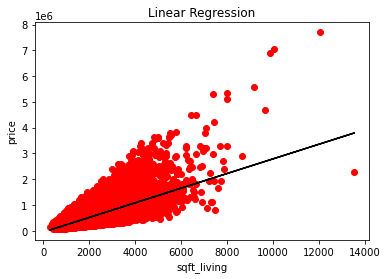

In [13]:
#Linear Regression plot

plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

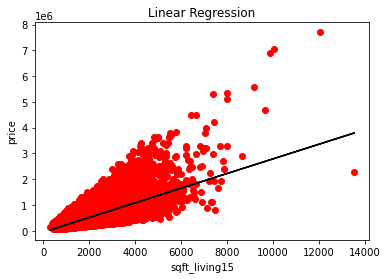

In [51]:
#Linear Regression plot

plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living15")
plt.plot(x,model.predict(x),color="k")
plt.show()

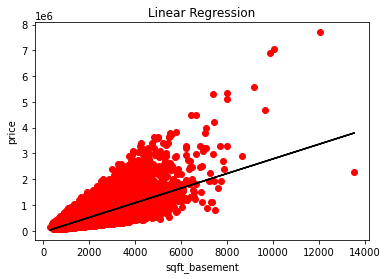

In [15]:
#Linear Regression plot

plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_basement")
plt.plot(x,model.predict(x),color="k")
plt.show()

### Multi-linear regression:

In [16]:
#Multi-linear Regression Code
#Adding more than one input to build our model

x=df[["sqft_living","sqft_basement"]]  
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) 

model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test) 

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62831668851.97098
R squared 0.5002155345241334


In [52]:
x=df[["sqft_living","bedrooms"]]  
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) 
model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test) 

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62482042098.95735
R squared 0.5029965846388876


In [53]:
x=df[["sqft_living","grade"]]  
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) 

model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test) 

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))



MSE 57413775762.86427
R squared 0.5433112989852685


In [17]:

x= df[["sqft_living","sqft_basement"]]
y= df["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))



MSE:  57232313800.45916
R squared:  0.5447547091563163


Our model has greatly improved by adding more features such as number of bedrooms and grade. 

### Polynomial Regression:

In [89]:
# Fitting Polynomial Regression to the dataset
x= df["sqft_living"].values.reshape(-1,1)
y= df["price"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))



MSE 57413775762.86427
R squared 0.5433112989852685


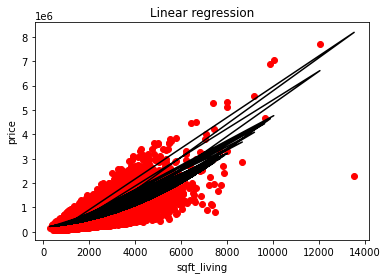

In [90]:
#Polynomial regression plot
#Visualising the Polynomial Regression results

plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 
